In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from glob import glob

In [2]:
image_size = [224, 224]

In [3]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folders = glob('tomato/train/*')

In [6]:
folders

['tomato/train\\Bacterial_spot',
 'tomato/train\\Early_blight',
 'tomato/train\\healthy',
 'tomato/train\\Late_blight',
 'tomato/train\\Leaf_Mold',
 'tomato/train\\mosaic_virus',
 'tomato/train\\Septoria_leaf_spot',
 'tomato/train\\Spider_mites',
 'tomato/train\\Target_Spot',
 'tomato/train\\Yellow_Leaf_Curl_Virus']

In [7]:
x = Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [12]:
train_set = train_data_gen.flow_from_directory('tomato/train/',
                                               target_size = (224,224), 
                                               batch_size = 32, 
                                               class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [13]:
test_set = test_data_gen.flow_from_directory('tomato/valid/', 
                                             target_size = (224,224), 
                                             batch_size = 32, 
                                             class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


Text(0.5, 1.0, 'Bacterial Spot')

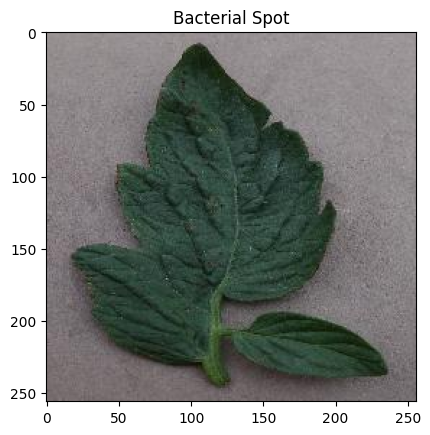

In [14]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("tomato/train/Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"))
plt.title("Bacterial Spot")

In [54]:
history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(train_set),
    validation_steps=len(test_set)
)

Epoch 1/10
574/574 [==============================] - 6106s 11s/step - loss: 0.1214 - accuracy: 0.9617 - val_loss: 0.3951 - val_accuracy: 0.9049
Epoch 2/10
574/574 [==============================] - 6065s 11s/step - loss: 0.1191 - accuracy: 0.9625 - val_loss: 0.3404 - val_accuracy: 0.9221
Epoch 3/10
574/574 [==============================] - 7925s 14s/step - loss: 0.1200 - accuracy: 0.9618 - val_loss: 0.3427 - val_accuracy: 0.9176
Epoch 4/10
574/574 [==============================] - 8551s 15s/step - loss: 0.1245 - accuracy: 0.9603 - val_loss: 0.3489 - val_accuracy: 0.9165
Epoch 5/10
574/574 [==============================] - 8003s 14s/step - loss: 0.1244 - accuracy: 0.9608 - val_loss: 0.6540 - val_accuracy: 0.8757
Epoch 6/10
574/574 [==============================] - 6871s 12s/step - loss: 0.1162 - accuracy: 0.9626 - val_loss: 0.8523 - val_accuracy: 0.8329
Epoch 7/10
574/574 [==============================] - 5768s 10s/step - loss: 0.1147 - accuracy: 0.9646 - val_loss: 0.3968 - val_ac

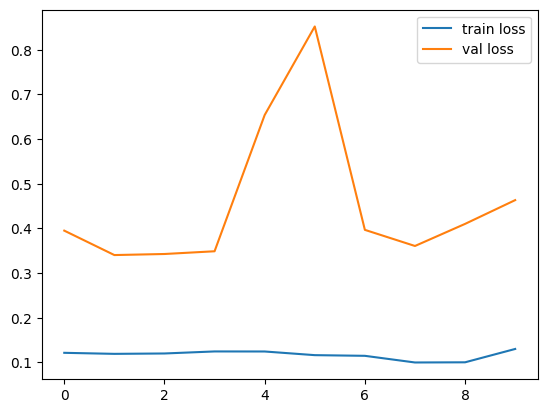

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

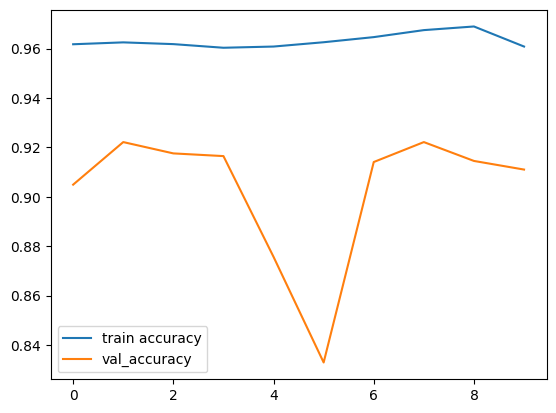

In [56]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [57]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [58]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    "tomato/train",
    shuffle=True,
    image_size =(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 18345 files belonging to 10 classes.


In [59]:
dataset_valid = tf.keras.preprocessing.image_dataset_from_directory(
    "tomato/valid",
    shuffle=True,
    image_size =(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4585 files belonging to 10 classes.


In [60]:
class_names = dataset_valid.class_names
class_names

['Bacterial_spot',
 'Early_blight',
 'Late_blight',
 'Leaf_Mold',
 'Septoria_leaf_spot',
 'Spider_mites',
 'Target_Spot',
 'Yellow_Leaf_Curl_Virus',
 'healthy',
 'mosaic_virus']

In [61]:
def get_dataset(dataset_train, dataset_valid, val_split=0.5, test_split = 0.5, shuffle = True, shuffle_size=10000):
    ds_size = len(dataset_valid)
    if shuffle:
        dataset_train = dataset_train.shuffle(shuffle_size, seed= 12)
        dataset_valid = dataset_valid.shuffle(shuffle_size, seed= 12)
    
    val_size = int(val_split*ds_size)
    val_ds=dataset_valid.take(val_size)
    test_ds = dataset_valid.skip(val_size)
    return dataset_train, val_ds, test_ds


In [62]:
train_ds, val_ds, test_ds = get_dataset(dataset_train, dataset_valid)

In [63]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
valid_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

Actual the leaf is : Early_blight
1/1 [==============================] - 16s 16s/step
Prediction of the image is : Early_blight


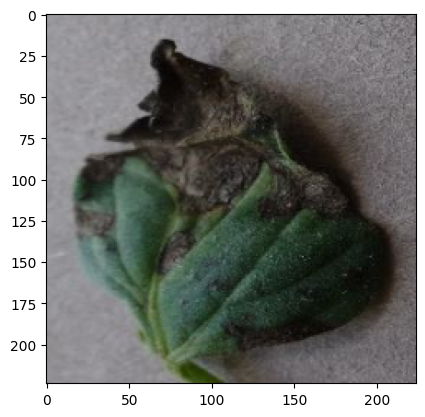

In [64]:
import numpy as np
for image_batch, labels_batch in dataset_train.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    plt.imshow(first_image)
    print('Actual the leaf is :', class_names[first_label])
    prediction = model.predict(image_batch)
    print('Prediction of the image is :', class_names[np.argmax(prediction[0])])

In [65]:
def predict(model, image):
    image_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array = tf.expand_dims(image_array, 0)
    
    prediction = model.predict(image_array)
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 3s 3s/step


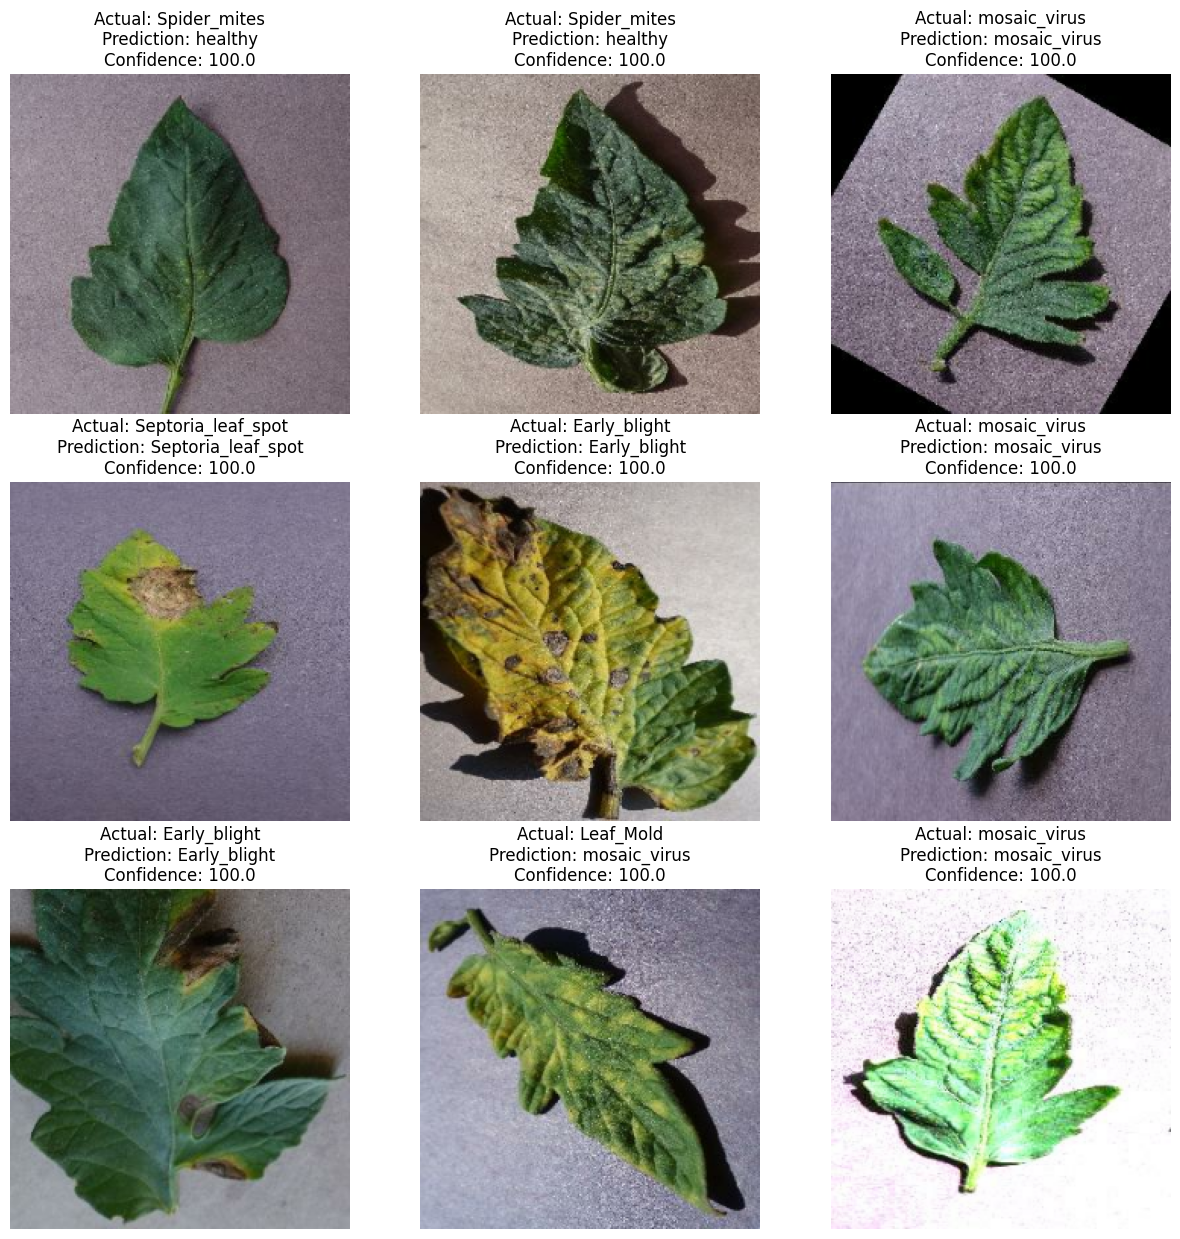

In [66]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        prediction_class, confidence = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\nPrediction: {prediction_class}\nConfidence: {confidence}")
        plt.axis('off')

In [67]:
from tensorflow.keras.models import load_model
model.save('vgg16_model.h5')